In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print("Vista del Dataset")
print(df.head())

print("Informacion general del Dataset")
print(df.info())


In [ ]:
print("Conteo de valores nulos por columna")
print(df.isnull().sum())

In [ ]:
#Division del conjunto de datos
x = df.drop(['sales', 'Unnamed: 0'], axis=1)
y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {x_train.shape}, Datos de prueba: {x_test.shape}")

In [ ]:
#Escalamiento de las características
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Creacion y entrenamiento del modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#Prediccion de datos
y_pred = model.predict(x_test_scaled)

print("Primeras predicciones")
print(y_pred[:10])  

In [ ]:
#Evaluacion del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print(f"\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raiz de error cuadratico medio (RMSE): {rmse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f"Error absoluto medio (MAE): {mae}")

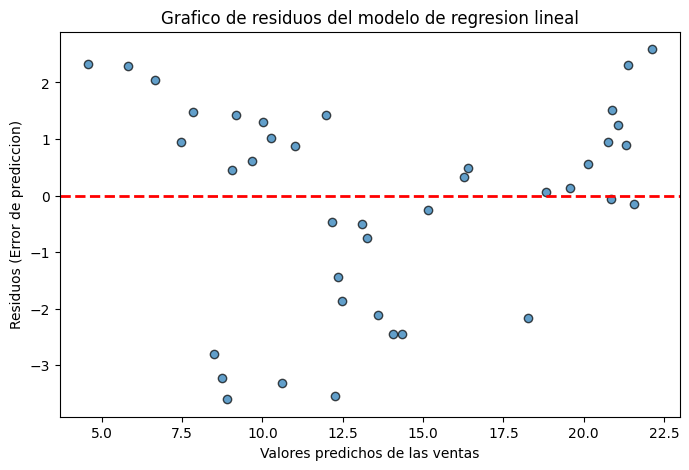

In [28]:
import matplotlib.pyplot as plt

residuos = y_test - y_pred
plt.figure(figsize=(8,5)) 
plt.scatter(y_pred, residuos, alpha = 0.7, edgecolors ='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Grafico de residuos del modelo de regresion lineal")
plt.xlabel("Valores predichos de las ventas")
plt.ylabel("Residuos (Error de prediccion)")
plt.show()